<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [13]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [9]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# **Task 2: Generate Descriptive Statistics and Visualizations**

For all visualizations, please include a title in each graph and appropriate labels. Generate the following and explain your findings:

### 2.1 For the "Median value of owner-occupied homes" provide a boxplot

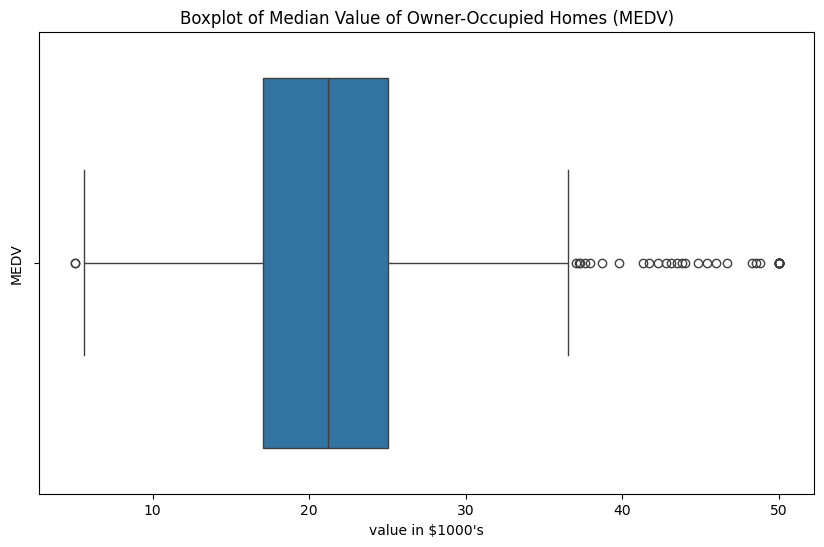

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel("value in $1000's")
plt.ylabel('MEDV')
plt.show()

**Explanation:** The boxplot shows that the majority of the owner-occupied homes have median values clustered between $17,000 and $25,000, with a median value around $20,000. There are a significant number of high-value outliers, suggesting some homes have much higher median values compared to the rest of the dataset.

### 2.2 Provide a  bar plot for the Charles river variable

<Figure size 1000x600 with 0 Axes>

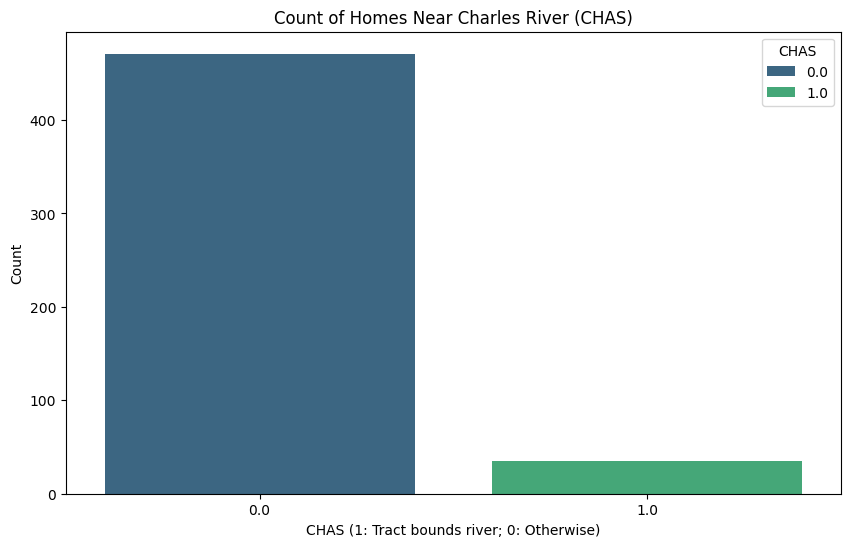

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CHAS', data=boston_df, hue='CHAS', palette='viridis')
plt.title('Count of Homes Near Charles River (CHAS)')
plt.xlabel('CHAS (1: Tract bounds river; 0: Otherwise)')
plt.ylabel('Count')
plt.show()

**Explanation:** The bar plot shows the distribution of homes in relation to their proximity to the Charles River. The vast majority of homes (indicated by the taller bar) are not near the Charles River (CHAS = 0). Only a small proportion of homes (indicated by the shorter bar) are near the Charles River (CHAS = 1). This suggests that most of the homes in the dataset are not located near the river.

### 2.3 Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [30]:
#First we discretize our AGE variable. The result is put into the new age_group column
cond1 = boston_df['AGE']<=35
cond2 = (boston_df['AGE']>35) & (boston_df['AGE']<70)
cond3 = boston_df['AGE']>=70

boston_df.loc[cond1, 'age_group'] = '35 years and younger'
boston_df.loc[cond2, 'age_group'] = 'between 35 and 70 years'
boston_df.loc[cond3, 'age_group'] = '70 years and older'

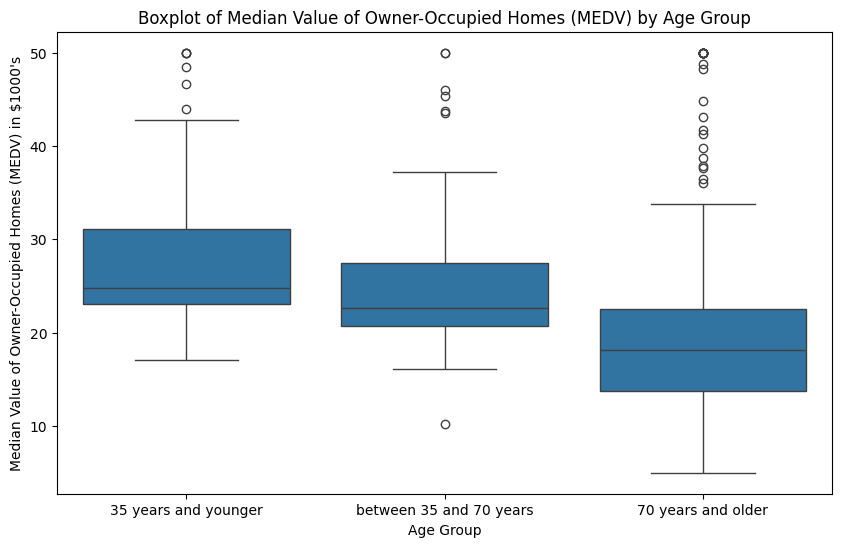

In [34]:
order = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
# "Convert the 'age_group' column to a categorical data type with the specified order."
boston_df['age_group'] = pd.Categorical(boston_df['age_group'], categories=order, ordered=True)


plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV) by Age Group')
plt.xlabel('Age Group')
plt.ylabel("Median Value of Owner-Occupied Homes (MEDV) in $1000's")
plt.show()

**Explanation:** Homes in areas with a higher proportion of older units (built before 1940) tend to have lower median values compared to homes in areas with a lower proportion of older units. Specifically:

Areas with fewer older units (35 years and younger) have higher median home values.
Areas with a moderate proportion of older units (between 35 and 70 years) have slightly lower median home values.
Areas with the highest proportion of older units (70 years and older) have the lowest median home values.
This suggests a negative correlation between the age of the housing stock and the median value of homes.

### 2.4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

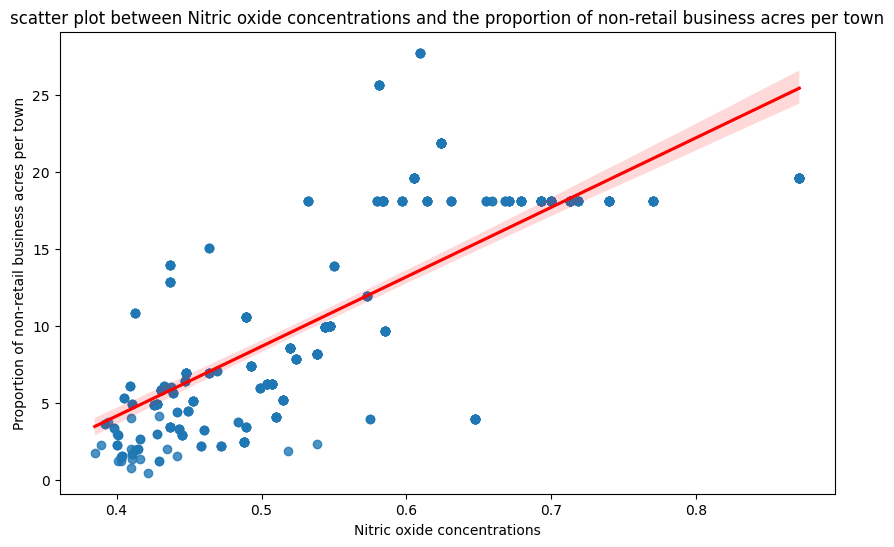

In [44]:
plt.figure(figsize=(10, 6))
sns.regplot(x='NOX', y='INDUS', data=boston_df, line_kws={'color': 'red'})
plt.title('scatter plot between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.xlabel('Nitric oxide concentrations')
plt.ylabel('Proportion of non-retail business acres per town')
plt.show()

**Explanation:** There is a positive correlation between nitric oxide concentrations and the proportion of non-retail business acres per town. As the concentration of nitric oxide increases, the proportion of non-retail business acres per town also tends to increase. This is shown by the red line which is the linear regression between both variables. 

### 2.5 Create a histogram for the pupil to teacher ratio variable

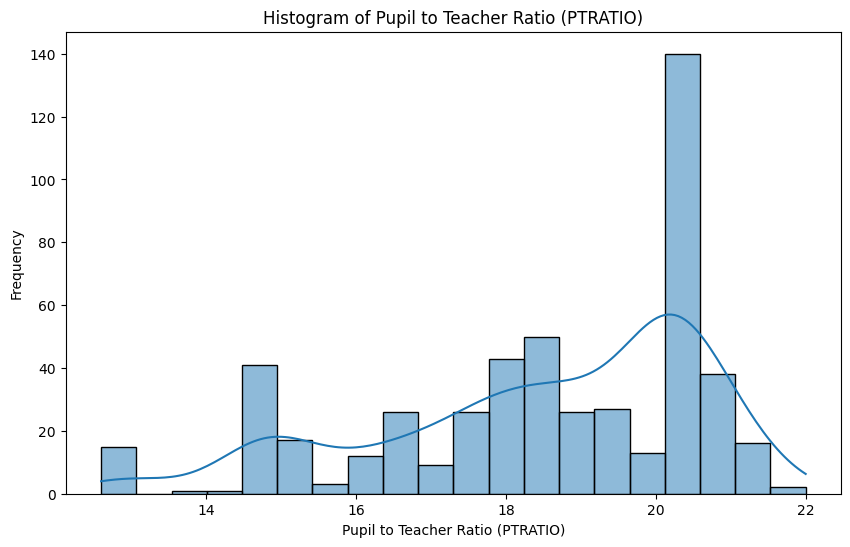

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(x='PTRATIO', data=boston_df, bins=20, kde=True)
plt.title('Histogram of Pupil to Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil to Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.show()

**Explanation:** The most common pupil-to-teacher ratio falls around 20, indicating that many schools have a ratio close to this value. The distribution is skewed to the left, with fewer schools having lower pupil-to-teacher ratios.

# **Task 3: Use the appropriate tests to answer the questions provided**

For each of the following questions be sure to:

1. State your hypothesis
2. Use α = 0.05
3. Perform the test Statistics.
4. State the conclusion from the test.

### 3.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

First we check if we can assume equal variance using the Levene's Test  
**Null_hypothesis_in_levene:** 'Variances are equal'  

In [46]:
cond1 = boston_df['CHAS']== 0.0
cond2 = boston_df['CHAS']== 1.0
series1 = boston_df[cond1]['MEDV']
series2 = boston_df[cond2]['MEDV']

scipy.stats.levene(series1, series2, center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value is lower than 0.05 we reject the Null_hypothesis. Therefore, **variances are different**.  

Now we perform a T-Test with different variance.  
**Null Hypothesis:** there is no difference in median value of houses between houses bounded by Charles river or not

In [47]:
scipy.stats.ttest_ind(series1, series2, equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis. This provides sufficient evidence to conclude that there is a statistically significant difference in median house values between properties bounded by the Charles River and those that are not.

### 3.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

First we check if we can assume equal variance using the Levene's Test  
**Null_hypothesis_in_levene:** 'Variances are equal'

In [48]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [49]:
scipy.stats.levene(thirtyfive_lower, thirtyfive_seventy, seventy_older, center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the p-value is greater than 0.05 we failed to reject the Null_hypothesis_in_levene. Therefore, variances are equal.  
  
Now, we perform an ANOVA Test with equal variances.  
**Null Hypothesis_ANOVA:** $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)

In [51]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ. This was already shown in the 2.3 boxplot

### 3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**Null Hypothesis** = $H\_0:$ Nitric oxide concentrations (NOX) is not correlated with proportion of non-retail business acres per town (INDUS)

In [52]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** Since the p-value  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  Nitric oxide concentrations and proportion of non-retail business acres per town. Additionally, The Pearson-R coefficient is 0.76, which indicates a high positive linear correlation between the variables. This relationship was already seen in the scatterplot 2.4.

### 3.4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**Null Hypothesis** = $H\_0:$ Weighted distance to the five Boston employment centres (DIS) is not correlated with the median value of owner occupied homes (MEDV)

In [54]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        03:12:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since Prob (F-statistic) = p_value < 0.05 there is evidence of correlation between DIS and MEDV. Additionally, R-squared:	0.062, and its square root is the Pearson-R coefficient = 0.25, which indicates a weak positive correlation between the variables. The DIS coef tells us that, in average, 1 unit of increment in DIS produces 1.09 units of increment in MEDV.  

Let's check that with a regplot:

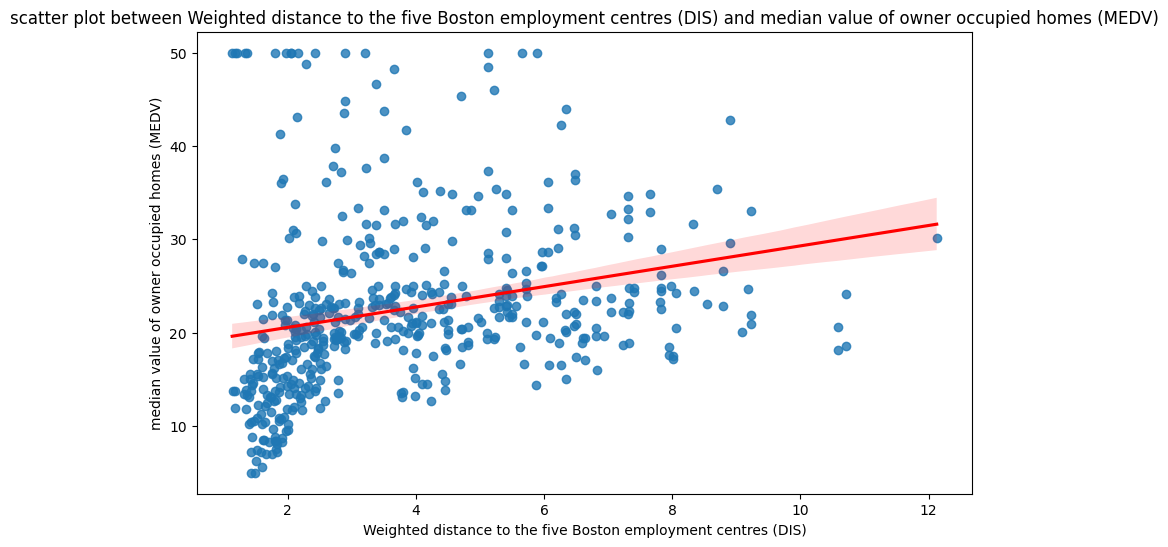

In [55]:
plt.figure(figsize=(10, 6))
sns.regplot(x='DIS', y='MEDV', data=boston_df, line_kws={'color': 'red'})
plt.title('scatter plot between Weighted distance to the five Boston employment centres (DIS) and median value of owner occupied homes (MEDV)')
plt.xlabel('Weighted distance to the five Boston employment centres (DIS)')
plt.ylabel('median value of owner occupied homes (MEDV)')
plt.show()

## **AUTHOR:** Faiber Alonso Leal